# Study on Mobile Tariffs

The purpose of any business is to make a profit. Distribution of resources is also associated with profit: it makes sense to invest the resources of the enterprise in what brings it.
Mobileoperators are not exception. In the modern market, each of them offers several tariffs - in order to attract and satisfy the needs of the largest number of users. However, not all tariffs are equally profitable for operators.
In this study, we will analyze the data of the operator "Megaline", offering customers two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, we will try to understand which tariff brings the company more revenue.
Below is a description of the rates:

**Smart Tariff**
Monthly fee: 550 rubles
Included 500 minutes of talk, 50 messages and 15 GB of internet traffic
The cost of services above the tariff package:
minute of conversation: 3 rubles
message: 3 rubles
1 GB of Internet traffic: 200 rubles

**Ultra Tariff**
Monthly fee: 1950 rubles
Included 3000 minutes of calls, 1000 messages and 30 GB of internet traffic
The cost of services above the tariff package:
minute of conversation: 1 ruble
message: 1 ruble
1 GB of Internet traffic: 150 rubles

We will analyze tariffs on a small sample of clients - about 500 Megaline users: regarding which we will have data on where they come from, what tariff they use, how many calls and messages, how many GB of traffic they used in 2018.

We will get the above data from several csv format files: '/datasets/calls.csv', '/datasets/internet.csv', '/datasets/messages.csv', '/datasets/tariffs.csv', '/datasets/ users.csv'.

From the assignment, we know that these files contain the following metrics:

 - Table users (information about users):
user_id - unique user ID
first_name - username
last_name - last name of the user
age — user's age (years)
reg_date — tariff connection date (day, month, year)
churn_date — date of contract termination (if the value is omitted, then the tariff was still valid at the time of data collection)
city — user's city of residence
tariff — tariff plan name
 - Table calls (information about calls):
id - unique call number
call_date — call date
duration — call duration in minutes
user_id — identifier of the user who made the call
 - Messages table (message information):
id - unique message number
message_date — message date
user_id - ID of the user who sent the message
 - Internet table (information about Internet sessions):
id — unique session number
mb_used - the amount of Internet traffic spent per session (in megabytes)
session_date — internet session date
user_id - user ID
 - Tariffs table (tariff information):
tariff_name — tariff name
rub_monthly_fee — monthly subscription fee in rubles
minutes_included - the number of minutes of conversation per month included in the subscription fee
messages_included - number of messages per month included in the subscription fee
mb_per_month_included - the amount of Internet traffic included in the subscription fee (in megabytes)
rub_per_minute - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
rub_per_message - the cost of sending a message in excess of the tariff package
rub_per_gb - the cost of an additional gigabyte of Internet traffic in excess of the tariff package (1 gigabyte = 1024 megabytes)

**The purpose of this study** is to test the following null hypotheses:
1. The average revenue of users of the Ultra and Smart tariffs does not differ;
2. The average revenue of users from Moscow does not differ from the revenue of users from other regions.

According to the results of the analysis, it is necessary either to accept the hypotheses or to reject them in favor of alternative ones: accordingly, the average revenue of users of the two tariffs is different, and the average revenue of users from Moscow and the regions is different.

**Study process**:

We will try to test the above hypotheses based on several tables with a sample of data about Megaline users. Since we do not have information about the format (except for the column names) and the quality of the data, before testing the hypotheses, we will overview the data and pre-process it, as well as perform data discovery and statistical analysis: this is necessary to eliminate errors that may affect the conclusions.


Thus, this study will include the following steps:

* data overview 
* data preprocessing
* data discovery and statistical analysis
* testing hypotheses


## Data Overview



In [47]:
import numpy as np  # importing numpy
import pandas as pd  # importing pandas
import os.path as path # importing os.path for file path managing
import seaborn as sns # importing seaborn for plotting
from scipy import stats as st # importing stats for statisctisc functions
from matplotlib.dates import DateFormatter # importing DateFormater for date formating while plotting

Let's make the first idea on the data. Before analyzing, we shall read the files in csv format, save them as tables to variables, and also look at the first 10 lines. Next, using the info() method, we will display general information about the dataframes:


In [48]:
# reading csv file and saving to calls
try:
    path_1 = 'calls.csv'
    calls = pd.read_csv(path_1) if path.exists(path_1) else pd.read_csv(f'/datasets/{path_1}') # checking for file path
    display(calls.head(10))  # getting first 10 rows of the dataframe
except:
     print('File not found') # if no path is correct, the error message will be printed


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [49]:
calls.info() # displaying general info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [50]:
# reading csv file and saving to internet
try:
    path_2 = 'internet.csv'
    internet = pd.read_csv(path_2, index_col=0) if path.exists(path_2) else pd.read_csv(f'/datasets/{path_2}', index_col=0) # checking for file path
except:
     print('File not found') # if no path is correct, the error message will be printed



In [51]:
internet.info()  # displaying general info on the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [52]:
# reading csv file and saving to messages
try:
    path_3 = 'messages.csv'
    messages = pd.read_csv(path_3) if path.exists(path_3) else pd.read_csv(f'/datasets/{path_3}') # checking for file path
    display(messages.head(10))  # getting first 10 rows of the dataframe
except:
     print('File not found') # if no path is correct, the error message will be printed


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [53]:
messages.info()  # displaying general info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [54]:
# reading csv file and saving to tariffs
try:
    path_4 = 'tariffs.csv'
    tariffs = pd.read_csv(path_4) if path.exists(path_4) else pd.read_csv(f'/datasets/{path_4}') # checking for file path
    display(tariffs.head(10))  # getting first 10 rows of the dataframe
except:
     print('File not found') # if no path is correct, the error message will be printed


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [55]:
tariffs.info()  # displaying general info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [56]:
# reading csv file and saving to users
try:
    path_5 = 'users.csv'
    users = pd.read_csv(path_5) if path.exists(path_5) else pd.read_csv(f'/datasets/{path_5}') # checking for file path
    display(users.head(10))  # getting first 10 rows of the dataframe
except:
     print('File not found') # if no path is correct, the error message will be printed


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [57]:
users.info()  # displaying general info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


So, we might have noticed that the data type in almost all columns in all dataframes complies with the declared metrics. We will make the appropriate adjustments further.
We also noticed that in all tables, excepting  the 'churn_date' column (which should not contain values if the service contract is not terminated) of the 'users' table, there is no missing data. This is positive for our study, since missing data often lead to biased conclusions.


Next,  we will check the data sample for explicit duplicates:


In [58]:
dfs = [users, tariffs, messages, internet, calls] # сreating a list of dataframes
for df in dfs: # iterating each element of the list
    print(df.duplicated().sum()) # findting the total amount of explicit duplicates

0
0
0
0
0


There are no explicit duplicates in the presented tables, therefore, each observation is unique.



**In the next section of the study, we will eliminate the anomalies identified during the data overview.**


## Data Preprocessing and Anomalies Elimination
### Change in Data Types 
From the data overview, it became clear that there are no missing values in the tables, except for one column where they make sense to be, there are no full duplicates, the data types are consistent with the metrics. However, we know from the assignment that "Megaline" always rounds up minutes of conversation to integers, while the 'duration' columns are of float type.
Let's change the data type in this column, rounding the values to integers, in accordance with the task. This insight will also be useful for further research.


In [59]:
calls['duration'] = np.ceil(calls['duration']).astype(int) # rounding upward and changing data type to int
calls.head(10)  # checking the result

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


###  Anomalies Elimination


From the assignment, we know that calls with zero duration are missed ones, therefore this is not an anomaly in the data. Let's check if there are zero values in the 'mb_used' column of the 'internet' table, since nothing is mentioned about it in the task. At the same time, for each user, as we can see from the table, only those dates are indicated when Internet traffic was used, so ideally we should not find zeros in the 'mb_used' column. Let's test this assumption:


In [60]:
len(internet[internet['mb_used']==0]['user_id']) # checking 0 in 'mb_used' column

19598

So, to our surprise, there are almost 20,000 zero values out of 149,396 dataframe rows. Let's look at users and dates, filtering by the same criteria. Perhaps we will notice a pattern:


In [61]:
display(internet[internet['mb_used']==0]['user_id'].unique()) # checking unique users with 0 Mb
internet[internet['mb_used']==0]['session_date'].unique()  # checking unique dates with 0 Mb

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

array(['2018-08-28', '2018-11-27', '2018-06-30', '2018-06-16',
       '2018-06-15', '2018-05-26', '2018-09-01', '2018-12-29',
       '2018-07-11', '2018-12-21', '2018-09-17', '2018-06-17',
       '2018-08-21', '2018-12-08', '2018-12-18', '2018-11-14',
       '2018-12-13', '2018-11-25', '2018-12-05', '2018-11-18',
       '2018-11-29', '2018-12-07', '2018-11-19', '2018-11-02',
       '2018-08-24', '2018-12-17', '2018-06-29', '2018-11-30',
       '2018-09-07', '2018-07-30', '2018-09-06', '2018-08-25',
       '2018-12-04', '2018-09-23', '2018-09-09', '2018-09-13',
       '2018-08-11', '2018-11-16', '2018-07-08', '2018-10-23',
       '2018-08-02', '2018-11-10', '2018-06-25', '2018-11-03',
       '2018-06-24', '2018-10-05', '2018-07-14', '2018-07-12',
       '2018-12-25', '2018-07-02', '2018-10-15', '2018-07-29',
       '2018-07-16', '2018-07-17', '2018-09-12', '2018-08-03',
       '2018-12-01', '2018-06-22', '2018-08-12', '2018-11-15',
       '2018-11-23', '2018-09-03', '2018-12-12', '2018-

So, 0 values in the "used megabytes" column are present for absolutely all users. Concerning
the dates, there are also a huge number of them, respectively, that is why we cannot establish a relationship between these values and individual dates/users. We can assume, for example, that in such situations the session was less 1 Mb of traffic, and according to the Megaline tariff rules, such sessions are equal to zero. Also, we do not know, how users pay for minutes/messages/internet not included in the tariff. Perhaps if a client does not have creadit on the account, and the GB included in the tariff are used up, the speed slows down a lot, and even if a client uses the Internet, MB counter does not turn on.


**Conclusions**
Thus, during the first two stages of preprocessing, we managed to bring the data to the required type and check them for eventual anomalies.


### Data Transforming  in Individual Columns
We know that all data refer to 2018, we also know that the subscription fee is charged monthly, so it makes sense to group the corresponding tables 'calls', 'messages', 'internet' by month. To do this, 
first of all, we will transform the corresponding columns in all dataframes and rename them:


In [62]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')  # formating date to "year-month-day"
calls['call_date'] = calls['call_date'].astype('datetime64[M]')  # formating date to "1st of month-month-year"
calls.rename(columns={'call_date': 'month'}, inplace=True) # renaming the column
calls.head(10) # checking the result

,id,month,duration,user_id
0,1000_0,2018-07-01,0,1000
1,1000_1,2018-08-01,0,1000
2,1000_2,2018-06-01,3,1000
3,1000_3,2018-09-01,14,1000
4,1000_4,2018-12-01,6,1000
5,1000_5,2018-11-01,0,1000
6,1000_6,2018-10-01,0,1000
7,1000_7,2018-08-01,19,1000
8,1000_8,2018-09-01,19,1000
9,1000_9,2018-08-01,0,1000


In [63]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')  # formating date to "year-month-day"
messages['message_date'] = messages['message_date'].astype('datetime64[M]')  # formating date to "1st of month-month-year"
messages.rename(columns={'message_date': 'month'}, inplace=True) # renaming the column
messages.head(10) # checking the result

,id,month,user_id
0,1000_0,2018-06-01,1000
1,1000_1,2018-10-01,1000
2,1000_2,2018-08-01,1000
3,1000_3,2018-06-01,1000
4,1000_4,2018-12-01,1000
5,1000_5,2018-06-01,1000
6,1000_6,2018-11-01,1000
7,1000_7,2018-10-01,1000
8,1000_8,2018-06-01,1000
9,1000_9,2018-12-01,1000


In [64]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')  # formating date to "year-month-day"
internet['session_date'] = internet['session_date'].astype('datetime64[M]')  # formating date to "1st of month-month-year"
internet.rename(columns={'session_date': 'month'}, inplace=True) # renaming the column
internet.head(10) # checking the result

,id,mb_used,month,user_id
0,1000_0,112.95,2018-11-01,1000
1,1000_1,1052.81,2018-09-01,1000
2,1000_2,1197.26,2018-06-01,1000
3,1000_3,550.27,2018-08-01,1000
4,1000_4,302.56,2018-09-01,1000
5,1000_5,399.97,2018-10-01,1000
6,1000_6,540.08,2018-09-01,1000
7,1000_7,415.70,2018-07-01,1000
8,1000_8,505.40,2018-10-01,1000
9,1000_9,345.54,2018-09-01,1000


We also know that the unit of measurement of the Internet tariff in tariffs is Gb, while in the 'tariffs' dataframe the data is presented in Mb. Let's convert MB to GB and rename the column:


In [65]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int') # converting MB to GB
tariffs.rename(columns={'mb_per_month_included': 'gb_included'}, inplace=True)  # renaming the column
tariffs.head()  # checking the result

,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Pivot Tables Creating and Adding Calculated Fatures
So, we improved the quality of the data in the existing tables. Next, let's move on to creating pivot tables in which minutes of conversation, messages and megabytes for each user will be grouped by month. Such a grouping makes sense for analyzing the profitability of tariffs, since the  fee is charged monthly.
Let's create the corresponding pivot tables from the source tables 'calls', 'messages', 'internet':



In [66]:
calls_summary = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index() # creating a summary table grouping by user_id and month
calls_summary.rename(columns={'duration': 'mins_per_month'}, inplace=True)  # renaming the column
calls_summary.head(15)  # checking the result


,user_id,month,mins_per_month
0,1000,2018-05-01,159
1,1000,2018-06-01,172
2,1000,2018-07-01,340
3,1000,2018-08-01,408
4,1000,2018-09-01,466
5,1000,2018-10-01,350
6,1000,2018-11-01,338
7,1000,2018-12-01,333
8,1001,2018-11-01,430
9,1001,2018-12-01,414


In [67]:
msg_summary = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()  # creating a summary table grouping by user_id and month
msg_summary.rename(columns={'id': 'msgs_per_month'}, inplace=True)   # renaming the column
msg_summary.head(15)  # checking the result

,user_id,month,msgs_per_month
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


In [68]:
internet_summary = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()  # creating a summary table grouping by user_id and month
internet_summary.head(15)  # checking the result

,user_id,month,mb_used
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91
5,1000,2018-10-01,14702.49
6,1000,2018-11-01,14756.47
7,1000,2018-12-01,9817.61
8,1001,2018-11-01,18429.34
9,1001,2018-12-01,14036.66


From the task, we know that, unlike calls, individual sessions are not counted, and at the end of the month the total amount of MB is rounded up. Since we grouped internet traffic for each user by month, we can do the necessary transformations on the 'mb_used' column and rename it:


In [69]:
internet_summary['mb_used'] = (internet_summary['mb_used']/1024).apply(np.ceil).astype(int)  # округляем в большую сторону и меняем тип данных на int
internet_summary.rename(columns={'mb_used': 'gb_used'}, inplace=True)   # переименовывыем столбец
internet_summary.head(15) # проверяем результат

,user_id,month,gb_used
0,1000,2018-05-01,3
1,1000,2018-06-01,23
2,1000,2018-07-01,14
3,1000,2018-08-01,14
4,1000,2018-09-01,15
5,1000,2018-10-01,15
6,1000,2018-11-01,15
7,1000,2018-12-01,10
8,1001,2018-11-01,18
9,1001,2018-12-01,14


Next, we should calculate the monthly revenue from each user: to do this, we subtract the free limit from the total number of calls, messages and Internet traffic, multiply the rest by the value from the tariff plan and add the subscription fee corresponding to the tariff plan. Let's merge the dataframes before making calculations:


In [70]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True) # renaming the column on which we will be merging
data = users.merge(tariffs, on='tariff', how='outer')  # merging tables by outer, to keep all data
data.head()  # checking the result

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30,3000,1950,150,1,1
2,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30,3000,1950,150,1,1
3,1013,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30,3000,1950,150,1,1
4,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30,3000,1950,150,1,1


Since the dataframe turned out to be quite large, we can remove the columns not involved in our study, which are, 'age', 'first_name', 'last_name', 'churn_date', 'reg_date':


In [71]:
data.drop(['age', 'first_name', 'last_name', 'churn_date', 'reg_date'], inplace=True, axis=1)  # deleting superfluous columns
data.head()  # checking the result

,user_id,city,tariff,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1
1,1003,Москва,ultra,1000,30,3000,1950,150,1,1
2,1004,Новокузнецк,ultra,1000,30,3000,1950,150,1,1
3,1013,Иваново,ultra,1000,30,3000,1950,150,1,1
4,1016,Омск,ultra,1000,30,3000,1950,150,1,1


In [72]:
info = calls_summary.merge(msg_summary, on=['user_id', 'month'], how='outer').merge(internet_summary, on=['user_id', 'month'], how='outer')  # merging tables by user id and month
info.head(20) #  checking the result

,user_id,month,mins_per_month,msgs_per_month,gb_used
0,1000,2018-05-01,159.0,22.0,3.0
1,1000,2018-06-01,172.0,60.0,23.0
2,1000,2018-07-01,340.0,75.0,14.0
3,1000,2018-08-01,408.0,81.0,14.0
4,1000,2018-09-01,466.0,57.0,15.0
5,1000,2018-10-01,350.0,73.0,15.0
6,1000,2018-11-01,338.0,58.0,15.0
7,1000,2018-12-01,333.0,70.0,10.0
8,1001,2018-11-01,430.0,NaN,18.0
9,1001,2018-12-01,414.0,NaN,14.0


In [73]:
data = data.merge(info, on='user_id', how='outer') # merging tables to the final one with all available data
data.head(20)  # checking the result

,user_id,city,tariff,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,mins_per_month,msgs_per_month,gb_used
0,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-05-01,159.0,22.0,3.0
1,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-06-01,172.0,60.0,23.0
2,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-07-01,340.0,75.0,14.0
3,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-08-01,408.0,81.0,14.0
4,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-09-01,466.0,57.0,15.0
5,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-10-01,350.0,73.0,15.0
6,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-11-01,338.0,58.0,15.0
7,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-12-01,333.0,70.0,10.0
8,1003,Москва,ultra,1000,30,3000,1950,150,1,1,2018-08-01,380.0,37.0,9.0
9,1003,Москва,ultra,1000,30,3000,1950,150,1,1,2018-09-01,961.0,91.0,13.0


In [74]:
data[['mins_per_month', 'msgs_per_month', 'gb_used',]].fillna(0, inplace=True) # filling in missing values with o in the selected columns

C:\Users\Tatiana\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [75]:
data['month_user_income'] = data['rub_monthly_fee'] # creating a new column with total income from each user monthly, fisrt filling in with the tariff fee
data.head() # checking the result

,user_id,city,tariff,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,mins_per_month,msgs_per_month,gb_used,month_user_income
0,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-05-01,159.0,22.0,3.0,1950
1,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-06-01,172.0,60.0,23.0,1950
2,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-07-01,340.0,75.0,14.0,1950
3,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-08-01,408.0,81.0,14.0,1950
4,1000,Краснодар,ultra,1000,30,3000,1950,150,1,1,2018-09-01,466.0,57.0,15.0,1950


In [76]:
cond1 = (data['minutes_included'] >= data['mins_per_month']) # creating a condition to compare used mins with included ones
data['month_user_income'].where(cond1, (data['month_user_income']+ (data['mins_per_month']-data['minutes_included'])*data['rub_per_minute']) , inplace=True)  # adding extra money in those rows where the used mins exceed the included ones 
data[['minutes_included', 'mins_per_month', 'rub_monthly_fee', 'month_user_income']].tail(25)  # checking the result

,minutes_included,mins_per_month,rub_monthly_fee,month_user_income
3191,500,411.0,550,550.0
3192,500,418.0,550,550.0
3193,500,48.0,550,550.0
3194,500,594.0,550,832.0
3195,500,557.0,550,721.0
3196,500,521.0,550,613.0
3197,500,484.0,550,550.0
3198,500,555.0,550,715.0
3199,500,582.0,550,796.0
3200,500,527.0,550,631.0


In [77]:
cond2 = (data['messages_included'] >= data['msgs_per_month'])  # creating a condition to compare used messages with the included ones
data['month_user_income'].where(cond2, (data['month_user_income']+ (data['msgs_per_month']-data['messages_included'])*data['rub_per_message']) , inplace=True)# adding extra money in those rows where the used messages exceed the included ones 
data[['messages_included', 'msgs_per_month', 'rub_monthly_fee', 'month_user_income']].tail(25)  # checking the result

,messages_included,msgs_per_month,rub_monthly_fee,month_user_income
3191,50,NaN,550,NaN
3192,50,NaN,550,NaN
3193,50,9.0,550,550.0
3194,50,45.0,550,832.0
3195,50,46.0,550,721.0
3196,50,49.0,550,613.0
3197,50,40.0,550,550.0
3198,50,35.0,550,715.0
3199,50,42.0,550,796.0
3200,50,41.0,550,631.0


In [78]:
cond3 = (data['gb_included'] >= data['gb_used'])  # creating a condition to compare included GB with the used ones
data['month_user_income'].where(cond3, (data['month_user_income']+ (data['gb_used']-data['gb_included'])*data['rub_per_gb']) , inplace=True)# adding extra money in those rows where the used GB exceed the included ones 
data[['user_id', 'month', 'gb_included', 'gb_used', 'rub_monthly_fee', 'month_user_income']].tail(25)  # checking the result



,user_id,month,gb_included,gb_used,rub_monthly_fee,month_user_income
3191,1494,2018-11-01,15,18.0,550,NaN
3192,1494,2018-12-01,15,18.0,550,NaN
3193,1496,2018-01-01,15,4.0,550,550.0
3194,1496,2018-02-01,15,28.0,550,3432.0
3195,1496,2018-03-01,15,25.0,550,2721.0
3196,1496,2018-04-01,15,21.0,550,1813.0
3197,1496,2018-05-01,15,24.0,550,2350.0
3198,1496,2018-06-01,15,20.0,550,1715.0
3199,1496,2018-07-01,15,24.0,550,2596.0
3200,1496,2018-08-01,15,23.0,550,2231.0


In [79]:
 data['month_user_income'].fillna(0, inplace=True) # filling in missing values with 0 in the selected column

**Conclusions**
During the final stage of data preprocessing, we received a new consolidated dataframe, which contains absolutely all information about each user and their behavior for each available month of 2018. We added a calculated feature to the table, which contains information on the total revenue received by Megaline per month per user.
Now we have everything we need to perform data discovery and statistical analysis, as well as hypothesis testing.


## Data Discovery and Statistical Analysis

Let's have a look at distribution of minutes, messages and Internet traffic on a monthly basis for users of a particular tariff. To do this, we will plot histograms:


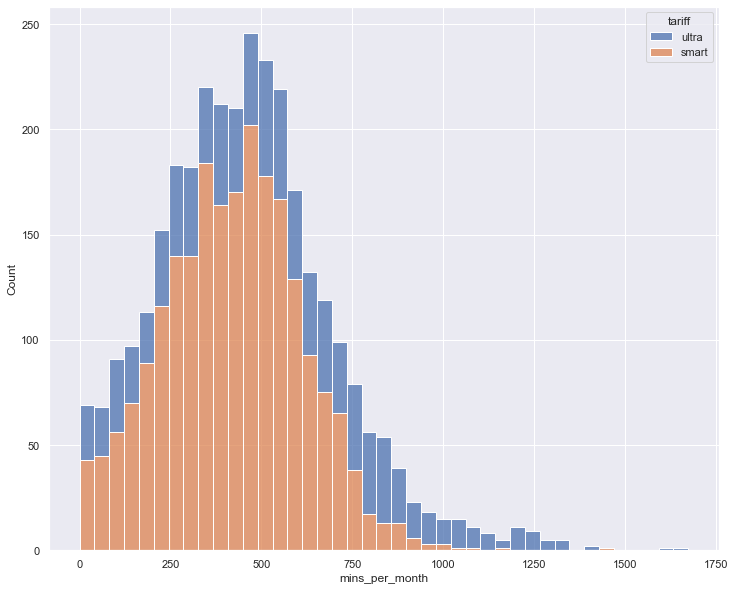

In [80]:
sns.histplot(x='mins_per_month',  data=data, hue='tariff', multiple="stack") # plotting minutes distrubution in one year for both tariffs
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size

It is quite evident from the histogram that for both tariffs this distribution tends to be normal, while the data themselves are somewhat skewed in the negative direction. Most subscribers of both tariffs fit into 450-500 minutes of conversation per month. At the same time, there are much more users of the "smart" tariff, who use the number of minutes inferior of the mode, than the ones who talk on the phone more often compared to the mode. As for the "ultra" tariff, on the contrary, more users use more than 450-500 minutes per month.


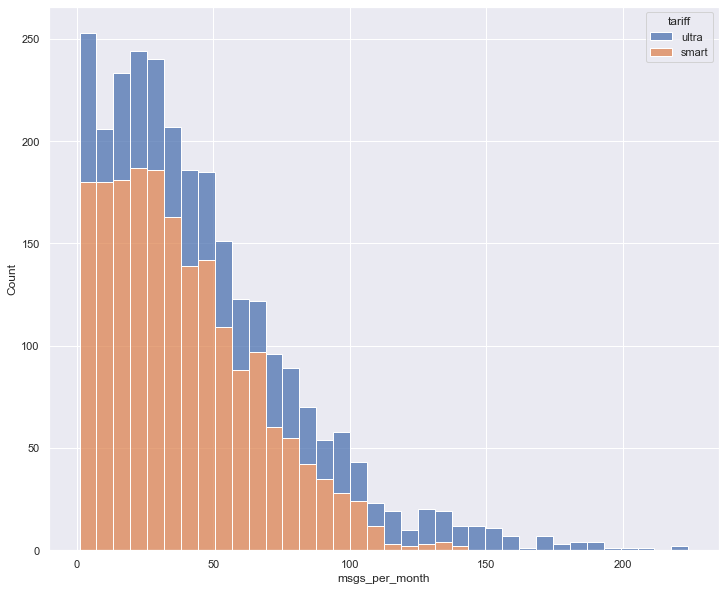

In [81]:
sns.histplot(x='msgs_per_month', hue='tariff', data=data, multiple="stack") # plotting messages distrubution in one year for both tariffs
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size

As far as it concerns distributions by the number of SMS, they are also very similar to each other. A huge number of users of the "smart" tariff sent less than 8 messages per month, the same number is typical for the largest group of subscribers of the "ultra" tariff. Only "ultra" subscribers send more than 140 messages per month, but they are relatively few.


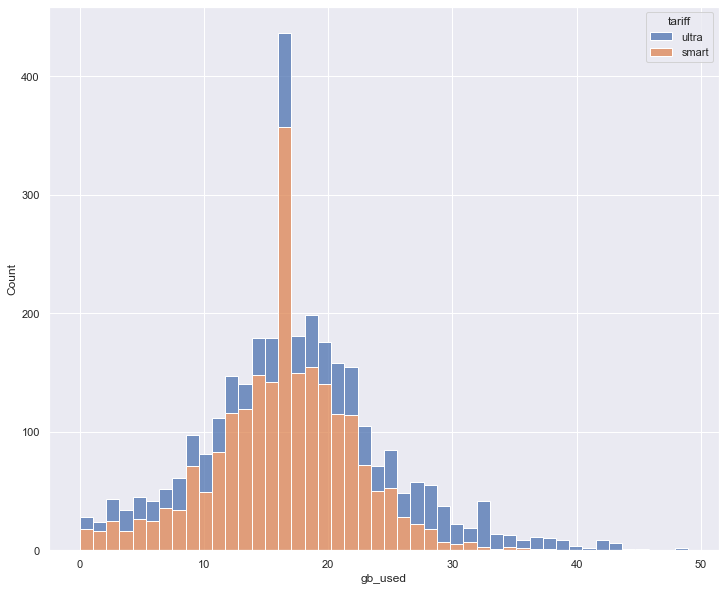

In [82]:
sns.histplot(x='gb_used', hue='tariff', data=data, multiple="stack") # plotting GB distrubution in one year for both tariffs
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size

The distribution of used Internet traffic also tends to be normal for both tariffs, it is noticeable from the hostogram that the dataset is somewhat skewed in the positive direction. The vast majority of users spend about 17 GB per month. The slope to the right occurs at the expense of "ultra" subscribers: most of them spend more than 17 GB per month and even exceed the included 30 GB. At the same time, more than half of the users of the "smart" tariff exceed the monthly limit.


In order to analyze user behavior by months depending on the tariff, we will create another pivot table in which we will group data by tariff and by months, calculating for each metric: minutes of conversation,
messages and internet traffic - mean, variance and standard deviation monthly. Since our data is a population sample, when calculating the variance and standard deviation, the parameter ddof=1 should be used, which is the default value in pandas built-in methods.


In [83]:
summary_pivot = data.pivot_table(index=["tariff","month"], values=['mins_per_month', 'msgs_per_month', 'gb_used'], aggfunc=['mean', 'var', 'std']).reset_index()  # creating a summary pivot for both tariffs with the stats
summary_pivot.columns = ["_".join((j,i)).strip() for i,j in summary_pivot.columns] # modifying columns names
summary_pivot.head(24)  # checking the result

,_tariff,_month,gb_used_mean,mins_per_month_mean,msgs_per_month_mean,gb_used_var,mins_per_month_var,msgs_per_month_var,gb_used_std,mins_per_month_std,msgs_per_month_std
0,smart,2018-01-01,8.735294,203.852941,20.000000,39.412656,23787.341355,252.133333,6.277950,154.231454,15.878707
1,smart,2018-02-01,11.844828,298.689655,27.940000,37.150938,36412.287961,440.465714,6.095157,190.820041,20.987275
2,smart,2018-03-01,15.233766,390.051948,35.550725,32.549897,36823.155161,669.780477,5.705252,191.893604,25.880117
3,smart,2018-04-01,13.625000,367.133929,35.864583,31.299550,34778.207127,517.865680,5.594600,186.489161,22.756662
4,smart,2018-05-01,15.907801,387.361702,39.032787,34.370010,34820.061094,638.775776,5.862594,186.601343,25.274014
5,smart,2018-06-01,15.951220,398.067485,38.577465,31.911716,29960.520109,731.635801,5.649046,173.091075,27.048767
6,smart,2018-07-01,15.875622,408.353234,38.988506,33.419453,32250.269602,719.352468,5.780956,179.583601,26.820747
7,smart,2018-08-01,16.807692,423.269231,38.750000,28.962859,34177.270551,767.213054,5.381715,184.870956,27.698611
8,smart,2018-09-01,16.392308,430.266409,39.219731,25.884110,32950.529526,702.505555,5.087643,181.522807,26.504821
9,smart,2018-10-01,16.880952,427.590444,39.082677,32.897042,34889.530319,736.503019,5.735594,186.787393,27.138589


We've got the data. Let's compare the statistics (mean, variance and standard deviation) for all metrics in each month of 2018, depending on the tariff. To do this, we will use a bar chart.


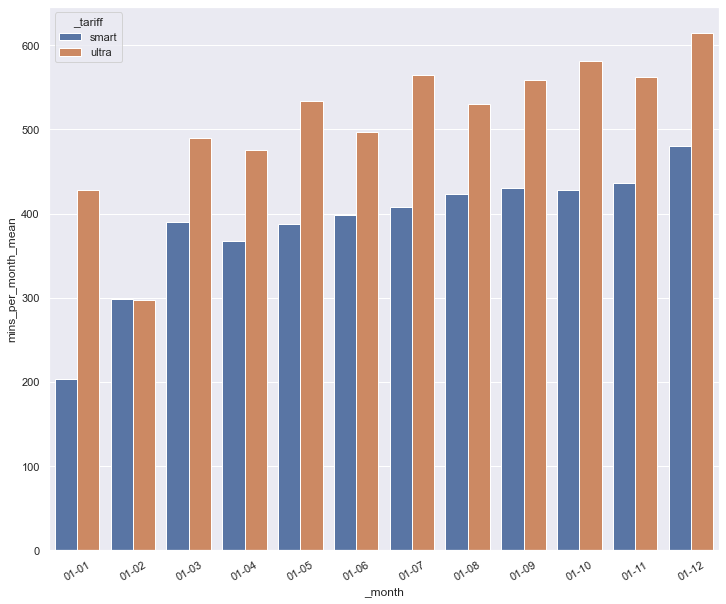

In [84]:
ax = sns.barplot(x='_month', y='mins_per_month_mean',  hue='_tariff', data=summary_pivot)  # plotting a barplot with both traiffs on
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) # setting x axis label rotation
date_form = DateFormatter("%m-%d") # setting date format
ax.xaxis.set_major_formatter(date_form); # applying date formatting

As it was logical to assume, in every month, except for February, "Ultra" tariff subscribers talk on the phone more often than "Smart" subscribers. February is an exception, so far there are no prerequisites to make any assumptions. This month is indeed shorter than all the others, but not enough to explain the difference.
On average, "smart" subscribers have more than enough  minutes included in the tariff (500), as for subscribers of the "ultra" tariff - for almost half a year they also do not use more than 500 minutes per month, the maximum is approx. 600 observed in December, however, such subscribers are very far from the limit of 3000 minutes.


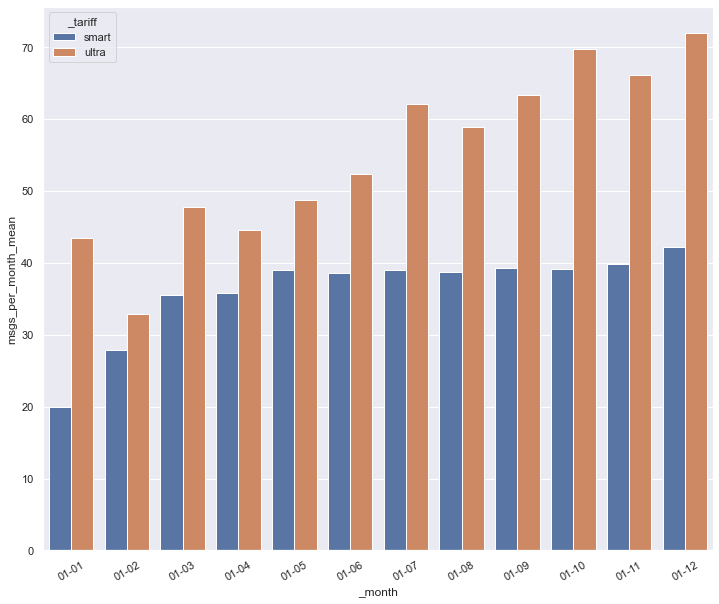

In [85]:
ax = sns.barplot(x='_month', y='msgs_per_month_mean', hue='_tariff', data=summary_pivot)  # plotting a barplot with both traiffs on
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) # setting x axis label rotation
date_form = DateFormatter("%m-%d") # setting date format
ax.xaxis.set_major_formatter(date_form); # applying date formatting

The same trends are observed among users of 2 different tariffs when it comes to the messages. On average, Ultra subscribers send more messages than Smart subscribers, especially in the second half of the year. February also stands out abnormally on this chart: Ultra users sent fewer messages than Smart users this month in 2018. In general, both of them have enough messages included in the tariff (50 and 1000), respectively, on average, more than 90% of messages remain unused for "Ultra" subscribers.


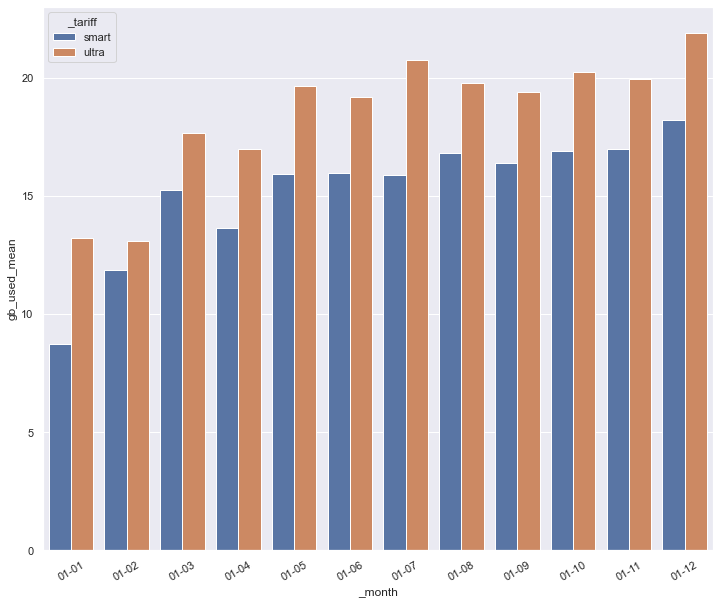

In [86]:
ax = sns.barplot(x='_month', y='gb_used_mean', hue='_tariff', data=summary_pivot)  # plotting a barplot with both traiffs on
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) # setting x axis label rotation
date_form = DateFormatter("%m-%d") # setting date format
ax.xaxis.set_major_formatter(date_form); # applying date formatting

The picture with Internet traffic is a little different, but here, too, February stands out anomalously for "Ultra" users. Probably there were some failures in data retrieving for this tariff for February 2018.
In 2/3 of the year, subscribers of the "Smart" tariff do not have enough included GB, on average they use 2 GB more. As for the "Ultra" subscribers, in most cases they use about 20 GB out of the 30 included, a burst of activity, as well as for the two previous ones, can be observed in December.


With regard to variance and standard deviation, we know that these statistics are interrelated (standard deviation is the square root of the variance), so to analyze the dispertion of values around the mean, it is enough to analyze one of them. Let's plot bar charts for the standard deviation for 3 given metrics:


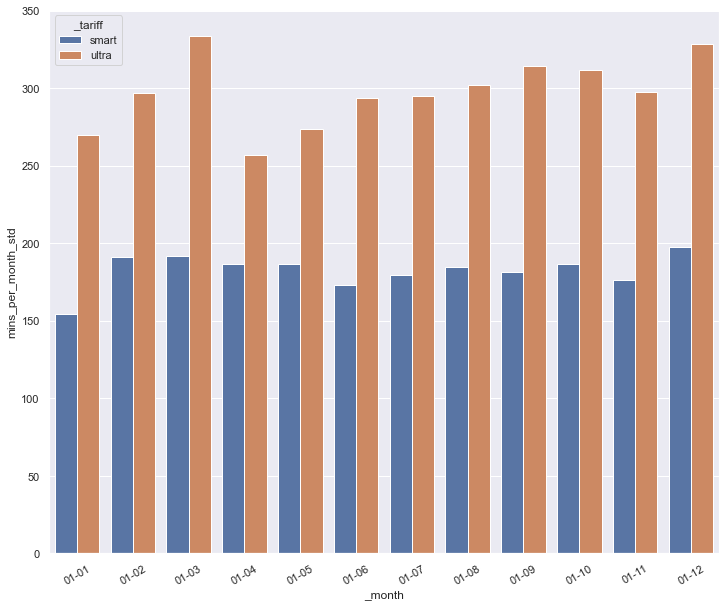

In [87]:
ax = sns.barplot(x='_month', y='mins_per_month_std',  hue='_tariff', data=summary_pivot)  # plotting a barplot with both traiffs on
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) # setting x axis label rotation
date_form = DateFormatter("%m-%d") # setting date format
ax.xaxis.set_major_formatter(date_form); # applying date formatting

The dispertion relative to the average value for "Ultra" users is much larger than for "Smart" ones, although it
is significant for  the latter either - approx. 150 in January. In each group, the users are very diverse.


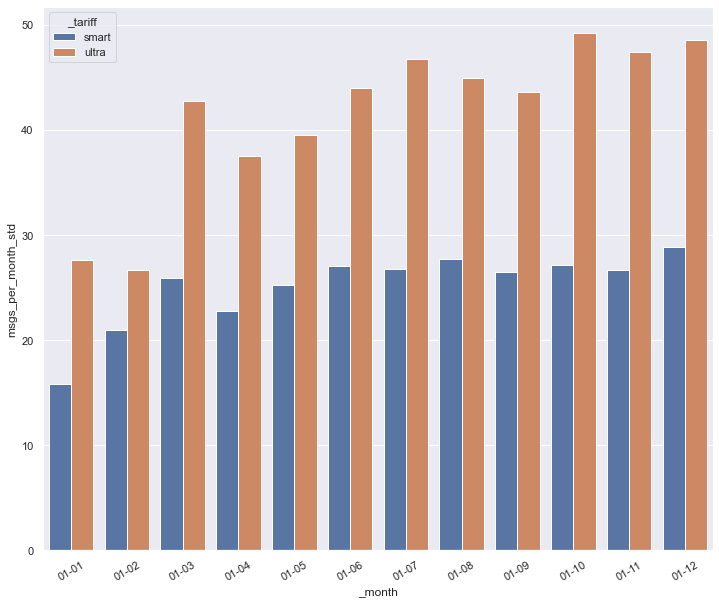

In [88]:
ax = sns.barplot(x='_month', y='msgs_per_month_std', hue='_tariff', data=summary_pivot)  # plotting a barplot with both traiffs on
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) # setting x axis label rotation
date_form = DateFormatter("%m-%d") # setting date format
ax.xaxis.set_major_formatter(date_form); # applying date formatting

Regarding the number of sent SMS, the trend does not change, the standard deviation for the "ultra" group is much
higher. Diverse behavior of subscribers using the same tariff is also evident in this metric.


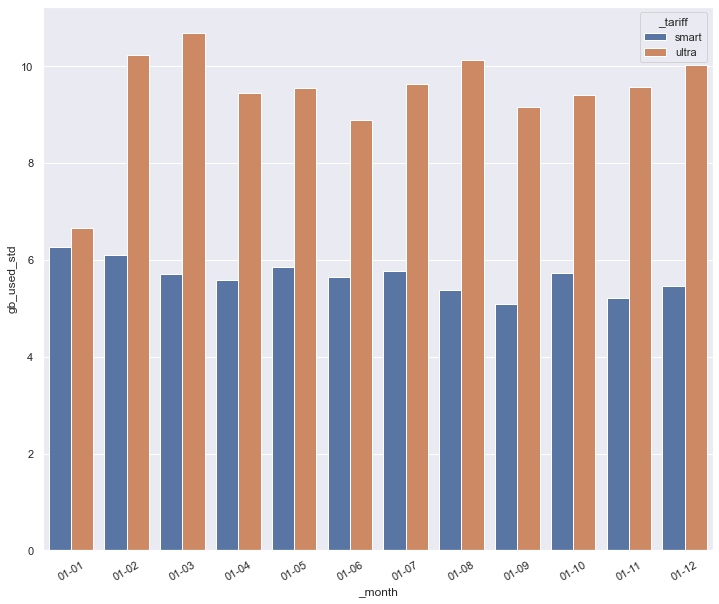

In [89]:
ax = sns.barplot(x='_month', y='gb_used_std', hue='_tariff', data=summary_pivot)  # plotting a barplot with both traiffs on
sns.set(rc = {'figure.figsize':(12,10)}) # setting the figure size
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) # setting x axis label rotation
date_form = DateFormatter("%m-%d") # setting date format
ax.xaxis.set_major_formatter(date_form); # applying date formatting

The same situation as in the previous plots is with GBs: the dispertion relative to the mean is
quite high, even more significant for "Ultra" subscribers.
The high standard deviation tells us that the mean in this case is very inaccurate in describing
presented sample: the values within it vary greatly.


**Conclusions**
So, we performed a data discovery  and statistical analysis of the data sample, calculated the mean, variance and standard deviation, and visualized the results.
Let's move on to the last phase of our study: testing hypotheses on difference between the individual categories of the sample.


## Проверка гипотез

Ideally, to test our hypotheses, it would be necessary to compare the means of the general populations of "smart" and "ultra" subscribers, subscribers in Moscow and other regions of Russia. Since we only have a sample of 500 subscribers at our disposal, we will divide them into appropriate subgroups and compare them using a t-test.

First of all, let's test the first pair of hypotheses (null and alternative):


* Н0: the average revenue of users of the Ultra and Smart tariffs does not differ.
* H1: the average revenue of users of the Ultra and Smart tariffs are different.


In [90]:
smart_user_income = data.query('tariff=="smart"')[['user_id', 'month_user_income']].groupby('user_id').sum()  # creating a dataframe only for smart users
smart_user_income.head(10) # checking the result

,month_user_income
user_id,
1001,0.0
1002,7250.0
1005,9924.0
1006,0.0
1007,8221.0
1008,568.0
1009,13100.0
1010,0.0
1011,15144.0


In [91]:
ultra_user_income = data.query('tariff=="ultra"')[['user_id', 'month_user_income']].groupby('user_id').sum()  # creating a dataframe only for ultra users
ultra_user_income.head(10) # checking the result

,month_user_income
user_id,
1000,15600.0
1003,9750.0
1004,15600.0
1013,3900.0
1016,3900.0
1018,17550.0
1019,11700.0
1021,17550.0
1024,0.0


In [93]:
alpha = 0.01 # setting a significance level
results = st.ttest_ind(smart_user_income['month_user_income'], ultra_user_income['month_user_income'], equal_var = False) # testing the hypothesis that the means of two independent populations are equal
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("The null hypothesis rejected")
else:
    print("Failed to reject the null hypothesis")

p-значение: 8.235057145576879e-06
The null hypothesis rejected


So, despite the chosen very low statistical significance level, the resulting p-value is so small that we can categorically reject the null hypothesis in favor of the alternative one, which means that **the average revenue of users of the Ultra and Smart tariffs are different.*


Next, we will test the second pair of hypotheses:
* H0: the average revenue of users from Moscow does not differ from the revenue of users from other regions.
* H1: The average revenue of users from Moscow differs from the revenue of users from other regions.

To do this, we will divide the available sample into two groups: subscribers from Moscow and all other regions and conduct a t-test.


In [95]:
moscow_user_income = data.query('city=="Москва"')[['user_id', 'month_user_income']].groupby('user_id').sum()  # creating a dataframe with only Moscow users
moscow_user_income.head(10) # checking the result

,month_user_income
user_id,
1001,0.0
1003,9750.0
1007,8221.0
1031,1781.0
1033,11484.0
1038,2450.0
1041,3233.0
1049,0.0
1051,5051.0


In [96]:
regions_user_income = data.query('city!="Москва"')[['user_id', 'month_user_income']].groupby('user_id').sum()  # creating a dataframe with only the users from other regions

In [97]:
alpha = 0.01 # setting a significance level
results = st.ttest_ind(moscow_user_income['month_user_income'], regions_user_income['month_user_income'], equal_var = False) # testing the hypothesis that the means of two independent populations are equal
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("The null hypothesis rejected")
else:
    print("Failed to reject the null hypothesis")

p-значение: 0.6160165314190258
Failed to reject the null hypothesis


The p-value is high: it means that the probability of getting the same means in both populations is high. Thus, the null hypothesis has been confirmed: **the average revenue of users from Moscow does not differ from the revenue of users from other regions.**


## Study Results
In this study, we tested two null hypotheses:

1. The average revenue of users of the "Ultra" and "Smart" tariffs do not differ.
This hypothesis was rejected by the result of the t-test in favor of the alternative one.
2. The average revenue of users from Moscow does not differ from the revenue of users from other regions.
Based on the results of the t-test, we could not reject this hypothesis, that is, it was confirmed.

From the point of view of classical statistics, the conclusions that we came to based on the results of our study are quite reliable: the number of elements in each of the subsamples formed from a total sample of 500 subscribers from the general population of all subscribers was more than 30 users. The result would be,certainly more accurate if we tested it on several samples of 500 users from the general population, not just one.

